In [1]:
# C:\Mark\uni\Uni Work\5th Year\Diss\ROC Surfaces\adni_noNA.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib notebook

# The data

In [2]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')
df['gender_recoded'] = df['gender']-1
df

,Unnamed: 0,RID,APOE4,MMSE,age,gender,educ,DX,abeta,tau,LeftHipp,RightHipp,Hipp,HCI,gender_recoded
0,1,2002,0,28,65,1,16,2,293,254,3.919,4.041,7.960,8.5163,0
1,2,2002,0,28,65,1,16,2,293,254,3.803,4.033,7.836,8.5163,0
2,3,2010,1,30,63,2,20,2,444,729,4.045,3.957,8.002,4.9071,1
3,4,2010,1,30,63,2,20,2,444,729,4.001,4.003,8.004,4.9071,1
4,5,2018,0,29,76,2,18,2,500,559,3.789,3.965,7.754,8.7040,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1030,5290,1,29,67,2,12,1,1808,1620,3.782,3.759,7.541,4.9309,1
1028,1031,5292,0,30,74,2,13,1,1850,1330,3.397,3.705,7.102,6.8485,1
1029,1032,5295,1,29,75,2,15,1,802,1792,2.657,3.271,5.928,18.9298,1
1030,1033,5296,0,29,69,1,14,1,270,569,5.140,5.392,10.532,10.1158,0


In [3]:
d1 = df[df['DX'] == 1]
d2 = df[df['DX'] == 2]
d3 = df[df['DX'] == 3]

In [4]:
def ROCSurfaceEmp(d1, d2, d3, marker, reverse=False, log=False):
    marker_1 = np.array(d1[marker])
    marker_2 = np.array(d2[marker])
    marker_3 = np.array(d3[marker])
    
    if log:
        marker_1 = np.log(marker_1)
        marker_2 = np.log(marker_2)
        marker_3 = np.log(marker_3)
    
    if reverse:
        marker_1 = [-i for i in marker_1]
        marker_2 = [-i for i in marker_2]
        marker_3 = [-i for i in marker_3]
    
    mu1d, sigma1d = np.mean(marker_1), np.std(marker_1)
    mu2d, sigma2d = np.mean(marker_2), np.std(marker_2)
    mu3d, sigma3d = np.mean(marker_3), np.std(marker_3)
    
    p1 = np.linspace(0,1,100)
    p3 = np.linspace(0,1,100)

    a = (mu3d - mu2d) / sigma2d
    b = sigma3d / sigma2d

    c = (mu1d - mu2d) / sigma2d
    d = sigma1d / sigma2d
    
    ecdf = ECDF(marker_2) 

    ROCsurface = []
    ROCsurface2 = []

    for i in p1:
        nowlist = []
        nowlist2 = []
        for j in p3:
            rocsurface_here = ecdf(np.quantile(marker_3, 1-j)) - ecdf(np.quantile(marker_1, i))

            if rocsurface_here >=0:
                nowlist.append(rocsurface_here)
                nowlist2.append(rocsurface_here)
            else:
                nowlist.append(0)
                nowlist2.append(np.nan)
        ROCsurface.append(nowlist)
        ROCsurface2.append(nowlist2)
        
    first = [ROCsurface[i][j] for i in range(100) for j in range(100)]
    VUS = np.nanmean(first)
    
    #ROCsurface2 = [np.nan if i == 0 else i for i in ROCsurface[j] for j in range(100)]
    
    return p1, ROCsurface, p3, VUS, ROCsurface2

# Covariates - Age and Gender

First we must investigate the data

In [6]:
marker = 'abeta'
cov1 = 'age'
cov2 = 'gender_recoded'

### Linear Models

In [8]:
from sklearn.linear_model import LinearRegression

# Pick out only the marker values
d1_marker = np.array(d1[marker])
d2_marker = np.array(d2[marker])
d3_marker = np.array(d3[marker])

# Pick out only the ages
d1_age= np.array(d1[cov1])
d2_age= np.array(d2[cov1])
d3_age= np.array(d3[cov1])

# Pick out only the gender (recoded to 0 for men and 1 for women)
d1_gender= np.array(d1[cov2])
d2_gender= np.array(d2[cov2])
d3_gender= np.array(d3[cov2])

# Reshape the data to work with sklearn
d1_age = d1_age.reshape(-1, 1)
d1_marker = d1_marker.reshape(-1, 1)
d1_gender = d1_gender.reshape(-1, 1)

d2_age = d2_age.reshape(-1, 1)
d2_marker = d2_marker.reshape(-1, 1)
d2_gender = d2_gender.reshape(-1, 1)

d3_age = d3_age.reshape(-1, 1)
d3_marker = d3_marker.reshape(-1, 1)
d3_gender = d3_gender.reshape(-1, 1)

X1 = np.array([[d1_age[i][0], d1_gender[i][0]] for i in range(len(d1_marker))])
X2 = np.array([[d2_age[i][0], d2_gender[i][0]] for i in range(len(d2_marker))])
X3 = np.array([[d3_age[i][0], d3_gender[i][0]] for i in range(len(d3_marker))])

pred_array1 = ([[i, 0] for i in np.arange(50,91)])
pred_array2 = ([[i, 1] for i in np.arange(50,91)])
pred_array = np.array(pred_array1 + pred_array2)

# Fit the linear model and find the parameters and the standard residual error for healthy
regd1 = LinearRegression().fit(X1, d1_marker)
beta1 = [regd1.intercept_[0], regd1.coef_[0][0], regd1.coef_[0][1]]
# Calculate sigma hat
yd1_hat = regd1.predict(X1)
residualsd1 = d1_marker - yd1_hat
residual_sum_of_squaresd1 = residualsd1.T @ residualsd1
sigmad1 = np.sqrt(residual_sum_of_squaresd1/(len(d1_marker)-2))
sigmad1 = sigmad1[0][0]

# Fit the linear model and find the parameters and the standard residual error for healthy
regd2 = LinearRegression().fit(X2, d2_marker)
beta2 = [regd2.intercept_[0], regd2.coef_[0][0], regd2.coef_[0][1]]
# Calculate sigma hat
yd2_hat = regd2.predict(X2)
residualsd2 = d2_marker - yd2_hat
residual_sum_of_squaresd2 = residualsd2.T @ residualsd2
sigmad2 = np.sqrt(residual_sum_of_squaresd2/(len(d2_marker)-2))
sigmad2 = sigmad2[0][0]

# Fit the linear model and find the parameters and the standard residual error for healthy
regd3 = LinearRegression().fit(X3, d3_marker)
beta3 = [regd3.intercept_[0], regd3.coef_[0][0], regd3.coef_[0][1]]
# Calculate sigma hat
yd3_hat = regd3.predict(X3)
residualsd3 = d3_marker - yd3_hat
residual_sum_of_squaresd3 = residualsd3.T @ residualsd3
sigmad3 = np.sqrt(residual_sum_of_squaresd3/(len(d3_marker)-2))
sigmad3 = sigmad3[0][0]

#### Residuals

<IPython.core.display.Javascript object>


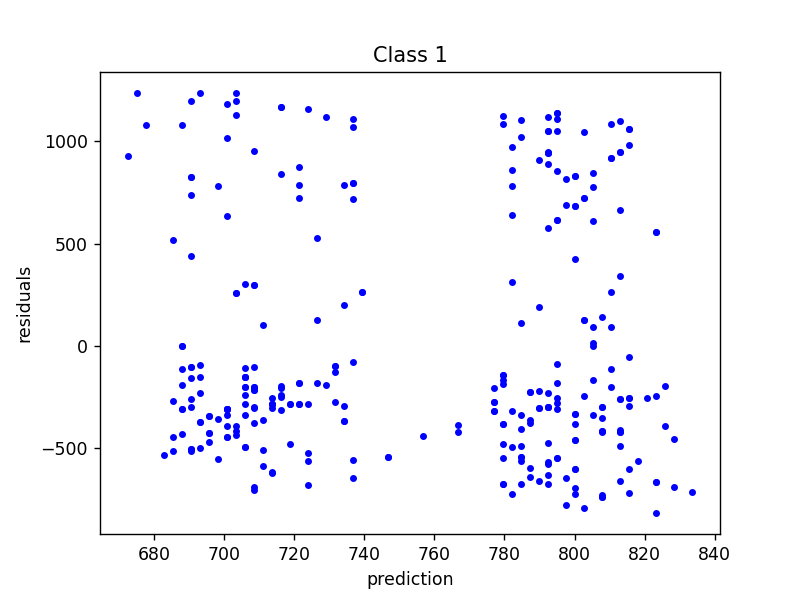

<IPython.core.display.Javascript object>


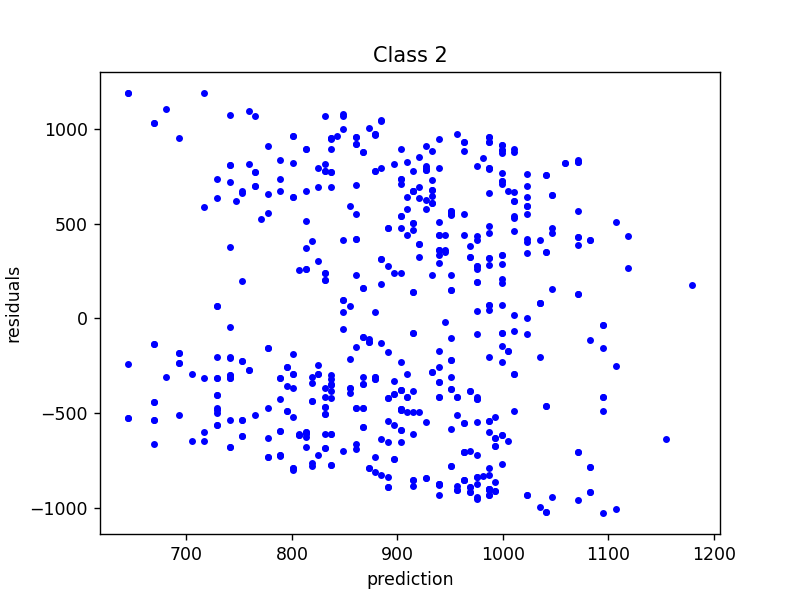

<IPython.core.display.Javascript object>


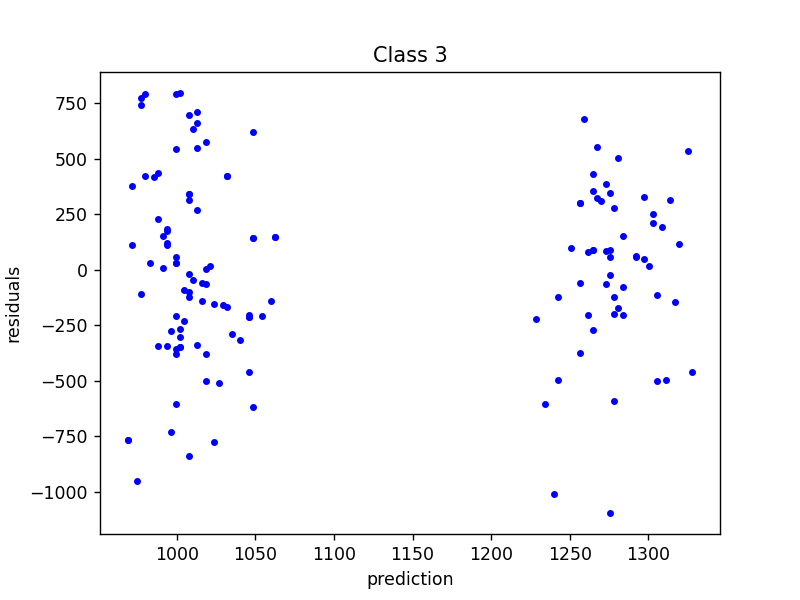

In [9]:
plt.figure()
plt.plot(yd1_hat,residualsd1, 'b.')
plt.title('Class 1')
plt.ylabel('residuals')
plt.xlabel('prediction')
plt.show()

plt.figure()
plt.plot(yd2_hat,residualsd2, 'b.')
plt.title('Class 2')
plt.ylabel('residuals')
plt.xlabel('prediction')
plt.show()

plt.figure()
plt.plot(yd3_hat,residualsd3, 'b.')
plt.title('Class 3')
plt.ylabel('residuals')
plt.xlabel('prediction')
plt.show()

### Covariate ROC Surfaces

In [10]:
gridsize=30

p1 = np.linspace(0,1,gridsize)
p3 = np.linspace(0,1,gridsize)

age_grid = np.arange(55,91)
gender = [0,1]

Xpred = np.array([[1, i, j] for i in np.arange(55,91) for j in [0,1]])

mu1_pred = Xpred @ np.array(beta1)
mu2_pred = Xpred @ np.array(beta2)
mu3_pred = Xpred @ np.array(beta3)

roc_age_est = {}
vus_age_est = {}

# Fit the ECDF to the standardised residuals of the diseased population
ecdf = ECDF([i[0] for i in residualsd2/sigmad2])

for k in range(len(age_grid)):
    for l in gender:
        
        if k == 0 and l == 0:
            index = 0        
        elif l == 0:
            index = 2*k
        elif l == 1:
            index = 2*k + 1
        
        a = (mu3_pred[index] - mu2_pred[index]) / sigmad2
        b = sigmad3 / sigmad3

        c = (mu1_pred[index] - mu2_pred[index]) / sigmad2
        d = sigmad3 / sigmad2

        ROC_surface = []

        for i in p1:
            nowlist = []
            for j in p3:
                roc_now = ecdf(a + b*np.quantile(residualsd3/sigmad3, 1-j)) - ecdf(c+d*np.quantile(residualsd1/sigmad1, i))

                if roc_now >= 0:
                    nowlist.append(roc_now)
                else:
                    nowlist.append(0)

            ROC_surface.append(nowlist)

        first = [ROC_surface[i][j] for i in range(gridsize) for j in range(gridsize)]
        VUS = np.nanmean(first)

        roc_age_est[f'Gender: {l}. Age: {k+55}'] = ROC_surface
        vus_age_est[f'Gender: {l}. Age: {k+55}'] = VUS
        print(f'Gender: {l}. Age: {k+55}')

Gender: 0. Age: 55
Gender: 1. Age: 55
Gender: 0. Age: 56
Gender: 1. Age: 56
Gender: 0. Age: 57
Gender: 1. Age: 57
Gender: 0. Age: 58
Gender: 1. Age: 58
Gender: 0. Age: 59
Gender: 1. Age: 59
Gender: 0. Age: 60
Gender: 1. Age: 60
Gender: 0. Age: 61
Gender: 1. Age: 61
Gender: 0. Age: 62
Gender: 1. Age: 62
Gender: 0. Age: 63
Gender: 1. Age: 63
Gender: 0. Age: 64
Gender: 1. Age: 64
Gender: 0. Age: 65
Gender: 1. Age: 65
Gender: 0. Age: 66
Gender: 1. Age: 66
Gender: 0. Age: 67
Gender: 1. Age: 67
Gender: 0. Age: 68
Gender: 1. Age: 68
Gender: 0. Age: 69
Gender: 1. Age: 69
Gender: 0. Age: 70
Gender: 1. Age: 70
Gender: 0. Age: 71
Gender: 1. Age: 71
Gender: 0. Age: 72
Gender: 1. Age: 72
Gender: 0. Age: 73
Gender: 1. Age: 73
Gender: 0. Age: 74
Gender: 1. Age: 74
Gender: 0. Age: 75
Gender: 1. Age: 75
Gender: 0. Age: 76
Gender: 1. Age: 76
Gender: 0. Age: 77
Gender: 1. Age: 77
Gender: 0. Age: 78
Gender: 1. Age: 78
Gender: 0. Age: 79
Gender: 1. Age: 79
Gender: 0. Age: 80
Gender: 1. Age: 80
Gender: 0. A

In [11]:
#roc_age_est.keys()
VUSs = [i for i in (vus_age_est.values())]
male_VUSs = VUSs[::2]    # Even rows are male
female_VUSs = VUSs[1::2] # Odd rows are female
#age_grid

<IPython.core.display.Javascript object>


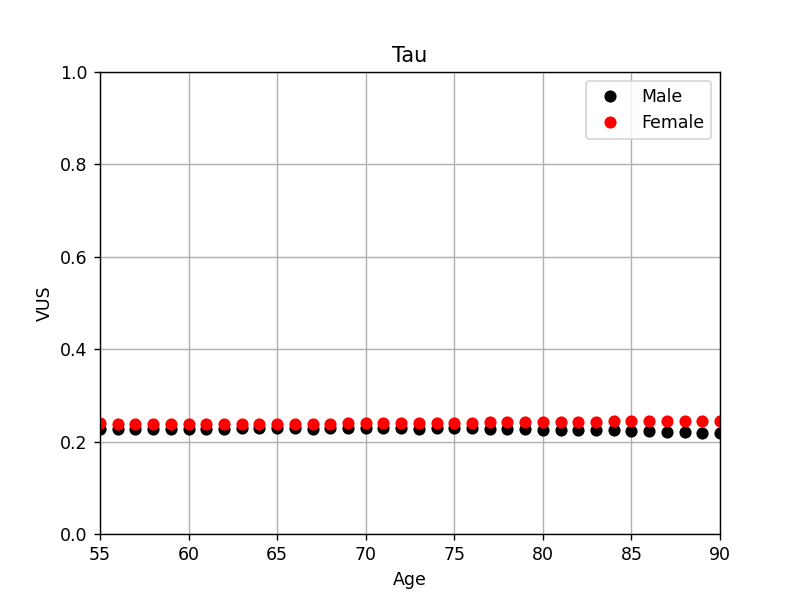

In [12]:
plt.figure()
plt.plot(age_grid, male_VUSs, 'ko', label='Male')
plt.ylim(0,1)
plt.xlim(55,90)
plt.title('Tau')
plt.xlabel('Age')
plt.ylabel('VUS')
plt.grid(visible=True)
plt.plot(age_grid, female_VUSs, 'ro', label='Female')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


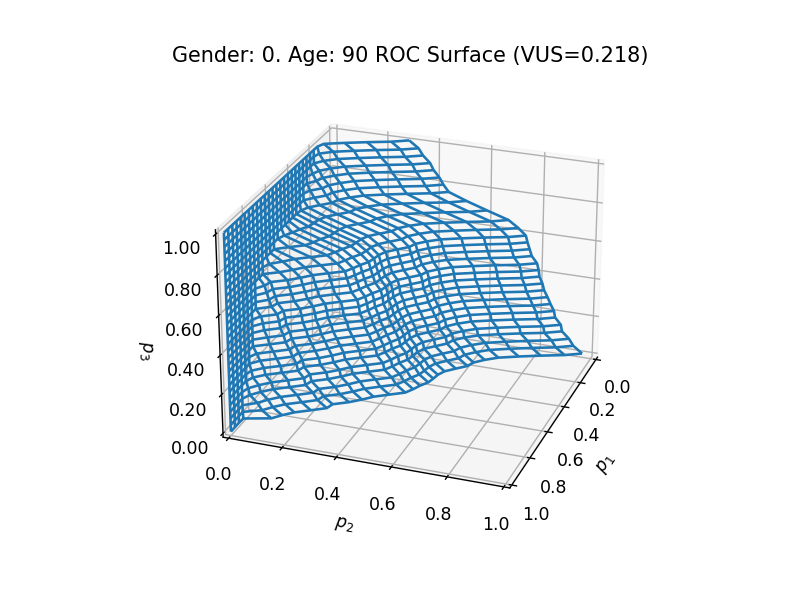

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

p1 = np.linspace(0,1,gridsize)
p3 = np.linspace(0,1,gridsize)

age = 'Gender: 0. Age: 90'
roc_age_est[age]

x, z = np.meshgrid(p1, p3)

surf = ax.plot_wireframe(x, roc_age_est[age], z, rstride=1, cstride=1)

ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_title(f"{age} ROC Surface (VUS={round(vus_age_est[age], 3)})")

ax.set_xlabel("$p_1$")
ax.set_xlim(0,1)

ax.set_ylabel("$p_2$")
ax.set_ylim(0,1)

ax.set_zlabel("$p_3$")
ax.set_zlim(0,1)

ax.view_init(elev=25, azim=20)

plt.show()

# Bootstrap 

## Coding Bootstrap

In [15]:
"""
BOOTSTRAPPING BELOW
"""

df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')
df['gender_recoded'] = df['gender']-1
data_len = df.shape[0]

VUSs = []
ROCs = []

gridsize = 25
bootstrapsize = 100

for counter in range(bootstrapsize):
    rdf = df.sample(n=data_len, replace=True)
    
    d1 = rdf[rdf['DX'] == 1]
    d2 = rdf[rdf['DX'] == 2]
    d3 = rdf[rdf['DX'] == 3]

    # Pick out only the marker values
    d1_marker = np.array(d1[marker])
    d2_marker = np.array(d2[marker])
    d3_marker = np.array(d3[marker])

    # Pick out only the ages
    d1_age= np.array(d1[cov1])
    d2_age= np.array(d2[cov1])
    d3_age= np.array(d3[cov1])

    # Pick out only the gender (recoded to 0 for men and 1 for women)
    d1_gender= np.array(d1[cov2])
    d2_gender= np.array(d2[cov2])
    d3_gender= np.array(d3[cov2])

    # Reshape the data to work with sklearn
    d1_age = d1_age.reshape(-1, 1)
    d1_marker = d1_marker.reshape(-1, 1)
    d1_gender = d1_gender.reshape(-1, 1)

    d2_age = d2_age.reshape(-1, 1)
    d2_marker = d2_marker.reshape(-1, 1)
    d2_gender = d2_gender.reshape(-1, 1)

    d3_age = d3_age.reshape(-1, 1)
    d3_marker = d3_marker.reshape(-1, 1)
    d3_gender = d3_gender.reshape(-1, 1)

    X1 = np.array([[d1_age[i][0], d1_gender[i][0]] for i in range(len(d1_marker))])
    X2 = np.array([[d2_age[i][0], d2_gender[i][0]] for i in range(len(d2_marker))])
    X3 = np.array([[d3_age[i][0], d3_gender[i][0]] for i in range(len(d3_marker))])

    pred_array1 = ([[i, 0] for i in np.arange(50,91)])
    pred_array2 = ([[i, 1] for i in np.arange(50,91)])
    pred_array = np.array(pred_array1 + pred_array2)

    # Fit the linear model and find the parameters and the standard residual error for healthy
    regd1 = LinearRegression().fit(X1, d1_marker)
    beta1 = [regd1.intercept_[0], regd1.coef_[0][0], regd1.coef_[0][1]]
    # Calculate sigma hat
    yd1_hat = regd1.predict(X1)
    residualsd1 = d1_marker - yd1_hat
    residual_sum_of_squaresd1 = residualsd1.T @ residualsd1
    sigmad1 = np.sqrt(residual_sum_of_squaresd1/(len(d1_marker)-2))
    sigmad1 = sigmad1[0][0]

    # Fit the linear model and find the parameters and the standard residual error for healthy
    regd2 = LinearRegression().fit(X2, d2_marker)
    beta2 = [regd2.intercept_[0], regd2.coef_[0][0], regd2.coef_[0][1]]
    # Calculate sigma hat
    yd2_hat = regd2.predict(X2)
    residualsd2 = d2_marker - yd2_hat
    residual_sum_of_squaresd2 = residualsd2.T @ residualsd2
    sigmad2 = np.sqrt(residual_sum_of_squaresd2/(len(d2_marker)-2))
    sigmad2 = sigmad2[0][0]

    # Fit the linear model and find the parameters and the standard residual error for healthy
    regd3 = LinearRegression().fit(X3, d3_marker)
    beta3 = [regd3.intercept_[0], regd3.coef_[0][0], regd3.coef_[0][1]]
    # Calculate sigma hat
    yd3_hat = regd3.predict(X3)
    residualsd3 = d3_marker - yd3_hat
    residual_sum_of_squaresd3 = residualsd3.T @ residualsd3
    sigmad3 = np.sqrt(residual_sum_of_squaresd3/(len(d3_marker)-2))
    sigmad3 = sigmad3[0][0]
    
    gridsize=30

    p1 = np.linspace(0,1,gridsize)
    p3 = np.linspace(0,1,gridsize)

    age_grid = np.arange(55,91)
    gender = [0,1]

    Xpred = np.array([[1, i, j] for i in np.arange(55,91) for j in [0,1]])

    mu1_pred = Xpred @ np.array(beta1)
    mu2_pred = Xpred @ np.array(beta2)
    mu3_pred = Xpred @ np.array(beta3)

    #roc_age_est = {}
    vus_age_est = {}

    # Fit the ECDF to the standardised residuals of the diseased population
    ecdf = ECDF([i[0] for i in residualsd2/sigmad2])

    for k in range(len(age_grid)):
        for l in gender:

            if k == 0 and l == 0:
                index = 0        
            elif l == 0:
                index = 2*k
            elif l == 1:
                index = 2*k + 1

            a = (mu3_pred[index] - mu2_pred[index]) / sigmad2
            b = sigmad3 / sigmad3

            c = (mu1_pred[index] - mu2_pred[index]) / sigmad2
            d = sigmad3 / sigmad2

            ROC_surface = []

            for i in p1:
                nowlist = []
                for j in p3:
                    roc_now = ecdf(a + b*np.quantile(residualsd3/sigmad3, 1-j)) - ecdf(c+d*np.quantile(residualsd1/sigmad1, i))

                    if roc_now >= 0:
                        nowlist.append(roc_now)
                    else:
                        nowlist.append(0)

                ROC_surface.append(nowlist)

            first = [ROC_surface[i][j] for i in range(gridsize) for j in range(gridsize)]
            VUS = np.nanmean(first)

            #roc_age_est[f'Gender: {l}. Age: {k+55}'] = ROC_surface
            vus_age_est[f'Gender: {l}. Age: {k+55}'] = VUS
            
    #ROCs.append(roc_age_est)
    VUSs.append(vus_age_est)
        
    if True:#counter % 10 == 0:
        print(counter)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


## Plotting Bootstrap

<IPython.core.display.Javascript object>


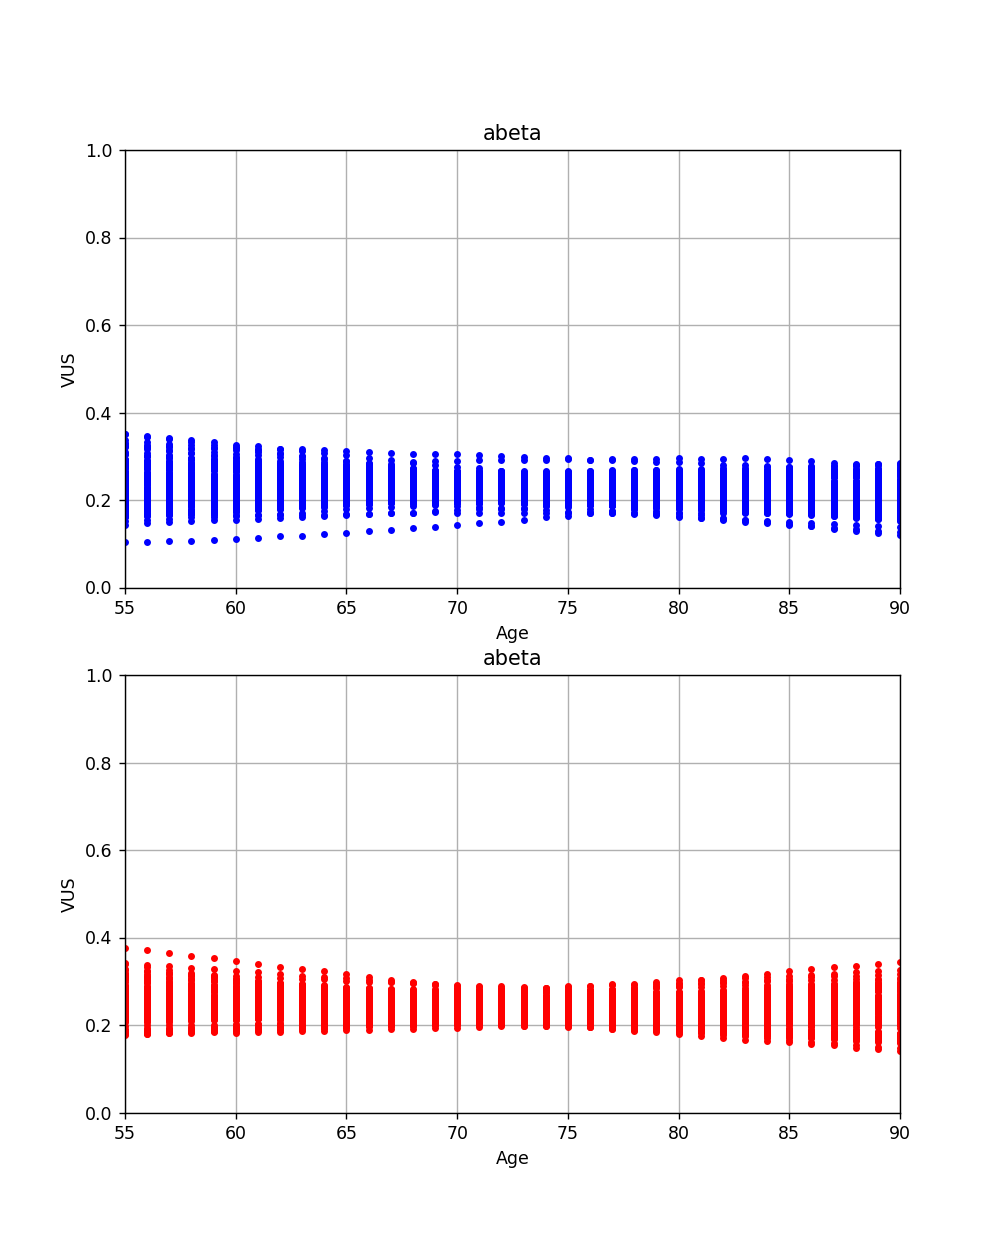

In [17]:
male_keys = [f'Gender: 0. Age: {i}' for i in np.arange(55,91)]
female_keys = [f'Gender: 1. Age: {i}' for i in np.arange(55,91)]

fig, ax = plt.subplots(2,1, figsize=(8,10))

for i in VUSs:
    toplotmale = {your_key : i[your_key] for your_key in male_keys}
    toplotfemale = {your_key : i[your_key] for your_key in female_keys}
    
    ax[0].plot(age_grid, toplotmale.values(), 'b.')
    ax[1].plot(age_grid, toplotfemale.values(), 'r.')
    
for i in ax:
    i.set_ylim(0,1)
    i.set_xlim(55,90)
    i.set_title(marker)
    i.grid()
    i.set_xlabel('Age')
    i.set_ylabel('VUS')

plt.grid(visible=True)
plt.show()

<IPython.core.display.Javascript object>


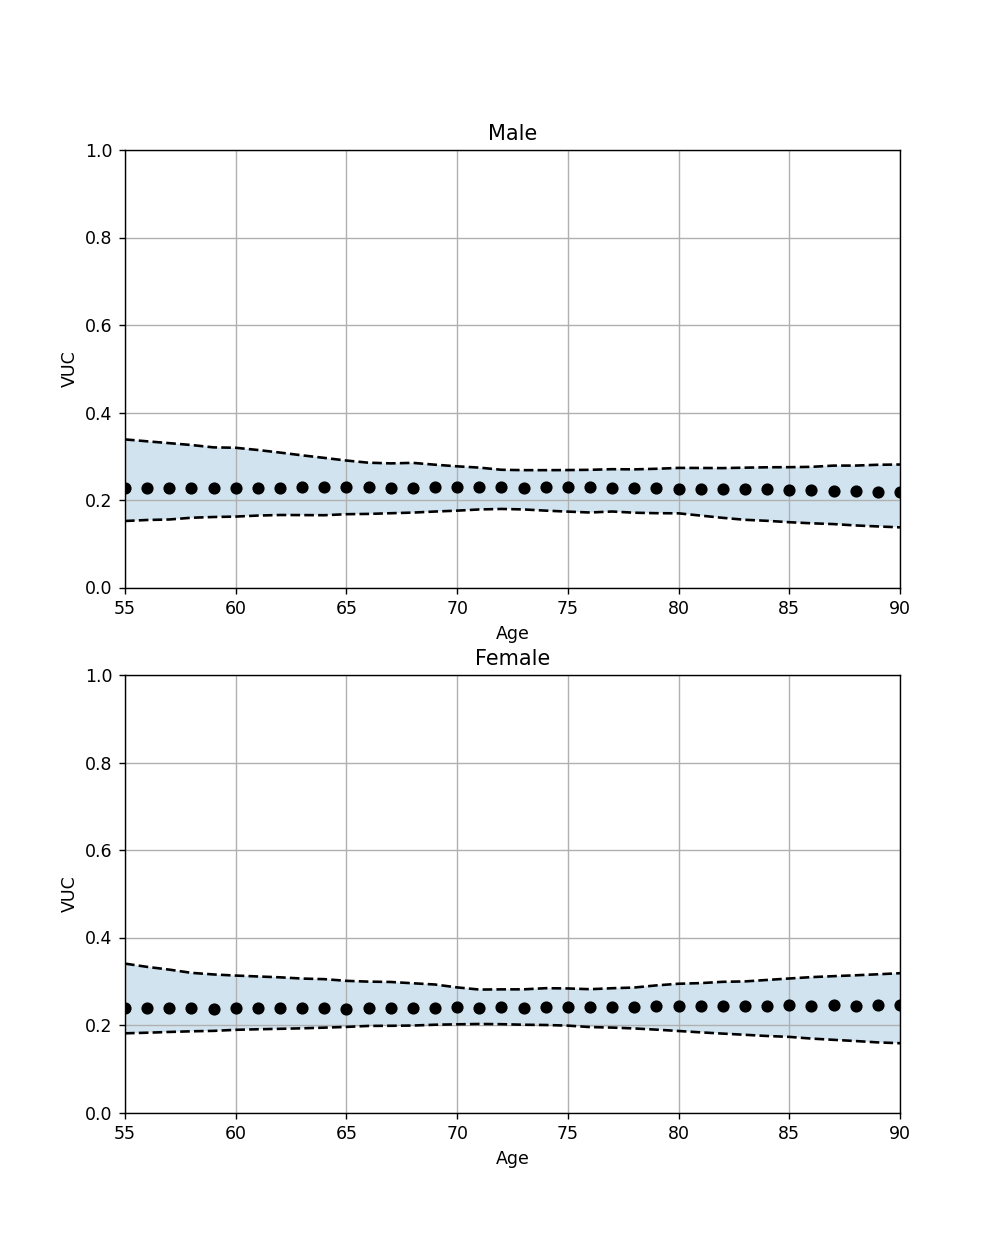

In [18]:
fig, ax = plt.subplots(2,1, figsize=(8,10))

"""
Male section below here, the code to calculate the quantiles of the VUS

"""

male_keys = [f'Gender: 0. Age: {i}' for i in np.arange(55,91)]

mVUC975s = []
mVUC25s = []
VUSs_now = []

for i in male_keys:
    VUSs_now = []
    for j in VUSs:
        VUSs_now.append(j[i])
        
    mVUC975 = stats.mstats.mquantiles(VUSs_now, 0.975)
    mVUC25 = stats.mstats.mquantiles(VUSs_now, 0.025)

    mVUC975s.append(mVUC975)
    mVUC25s.append(mVUC25)

mVUC25s = [i[0] for i in mVUC25s]
mVUC975s = [i[0] for i in mVUC975s]

"""
Female section below here, the code to calculate the quantiles of the VUS

"""
female_keys = [f'Gender: 1. Age: {i}' for i in np.arange(55,91)]

fVUC975s = []
fVUC25s = []
VUSs_now = []

for i in female_keys:
    VUSs_now = []
    for j in VUSs:
        VUSs_now.append(j[i])
        
    fVUC975 = stats.mstats.mquantiles(VUSs_now, 0.975)
    fVUC25 = stats.mstats.mquantiles(VUSs_now, 0.025)

    fVUC975s.append(fVUC975)
    fVUC25s.append(fVUC25)

fVUC25s = [i[0] for i in fVUC25s]
fVUC975s = [i[0] for i in fVUC975s]


"""
Plotting

"""

ax[0].set_title('Male')
ax[0].plot(age_grid, mVUC975s, 'k--')
ax[0].plot(age_grid, mVUC25s, 'k--')
ax[0].fill_between(age_grid, mVUC25s, mVUC975s, alpha=0.2)
ax[0].plot(age_grid, male_VUSs, 'ko', label='Male')

ax[1].set_title('Female')
ax[1].plot(age_grid, fVUC975s, 'k--')
ax[1].plot(age_grid, fVUC25s, 'k--')
ax[1].fill_between(age_grid, fVUC25s, fVUC975s, alpha=0.2)
ax[1].plot(age_grid, female_VUSs, 'ko', label='Female')

for i in ax:
    i.grid()
    i.set_xlim(55,90)
    i.set_xlabel('Age')
    i.set_ylabel('VUC')
    i.set_ylim(0,1)
plt.show()